In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [307]:
df1= pd.read_csv("Avocado.csv")

In [308]:
df1.shape

(18249, 13)

In [309]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [310]:
df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [311]:
df1.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [312]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [313]:
df1.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [314]:
df1.describe(include=[object])

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,20-08-2017,conventional,Roanoke
freq,108,9126,338


In [315]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [316]:
print(df1.groupby("region").size()) # here we saw that each region has same no. of datset

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [317]:
print(df1.groupby("type").size()) # Type is also evenly distributed

type
conventional    9126
organic         9123
dtype: int64


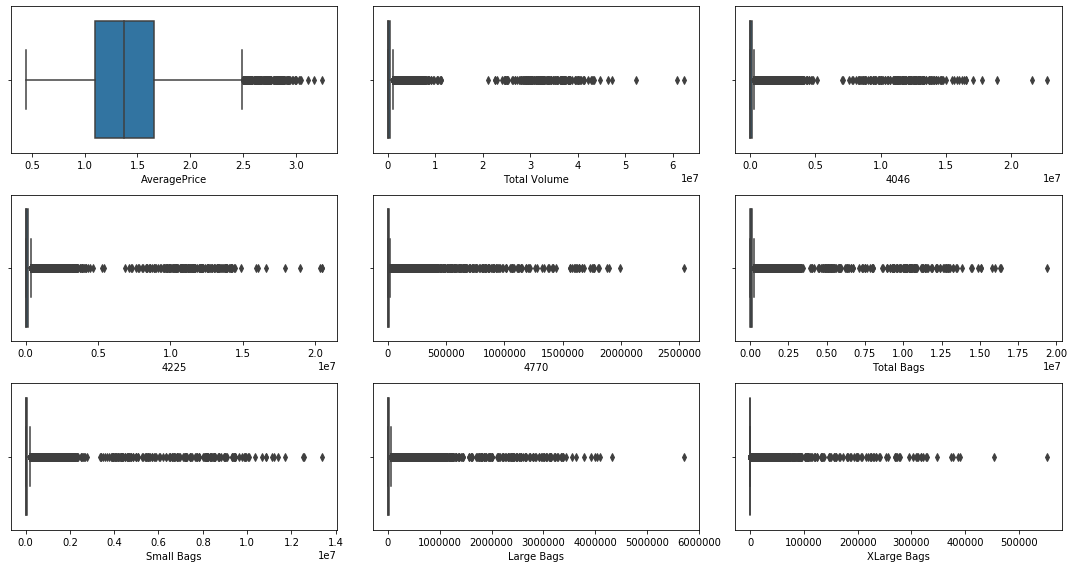

In [318]:
# Univariate analysis to understand each feature
fig,ax=plt.subplots(3,3,figsize=(15,8))
sns.boxplot(x=df1["AveragePrice"],ax=ax[0,0])
sns.boxplot(x=df1["Total Volume"],ax=ax[0,1])
sns.boxplot(x=df1["4046"],ax=ax[0,2])
sns.boxplot(x=df1["4225"],ax=ax[1,0])
sns.boxplot(x=df1["4770"],ax=ax[1,1])
sns.boxplot(x=df1["Total Bags"],ax=ax[1,2])
sns.boxplot(x=df1["Small Bags"],ax=ax[2,0])
sns.boxplot(x=df1["Large Bags"],ax=ax[2,1])
sns.boxplot(x=df1["XLarge Bags"],ax=ax[2,2])
plt.tight_layout()
plt.show()

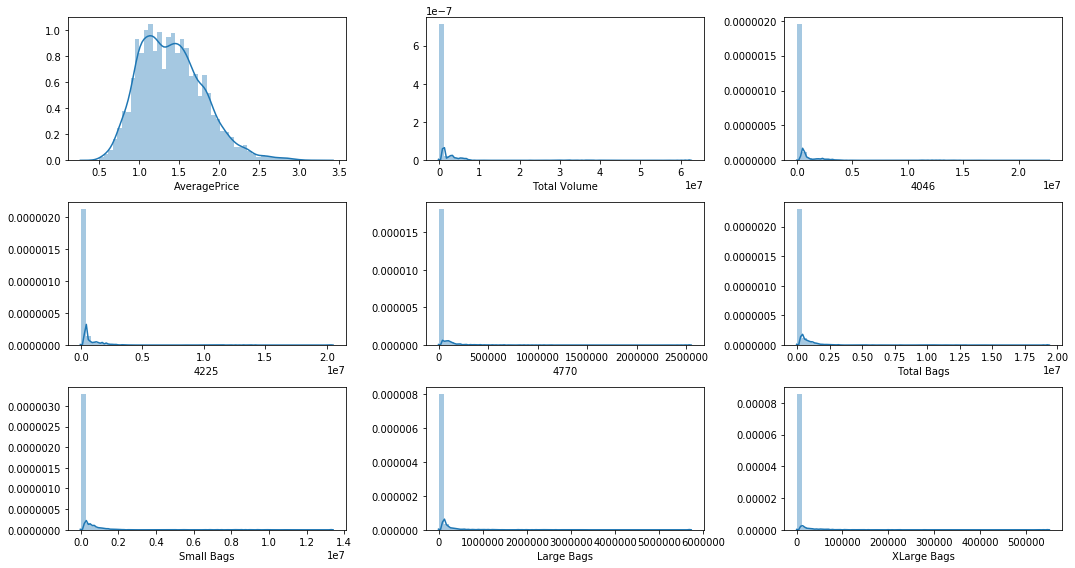

In [319]:
fig,ax=plt.subplots(3,3,figsize=(15,8))
sns.distplot(df1["AveragePrice"],ax=ax[0,0])
sns.distplot(df1["Total Volume"],ax=ax[0,1])
sns.distplot(df1["4046"],ax=ax[0,2])
sns.distplot(df1["4225"],ax=ax[1,0])
sns.distplot(df1["4770"],ax=ax[1,1])
sns.distplot(df1["Total Bags"],ax=ax[1,2])
sns.distplot(df1["Small Bags"],ax=ax[2,0])
sns.distplot(df1["Large Bags"],ax=ax[2,1])
sns.distplot(df1["XLarge Bags"],ax=ax[2,2])
plt.tight_layout()
plt.show()

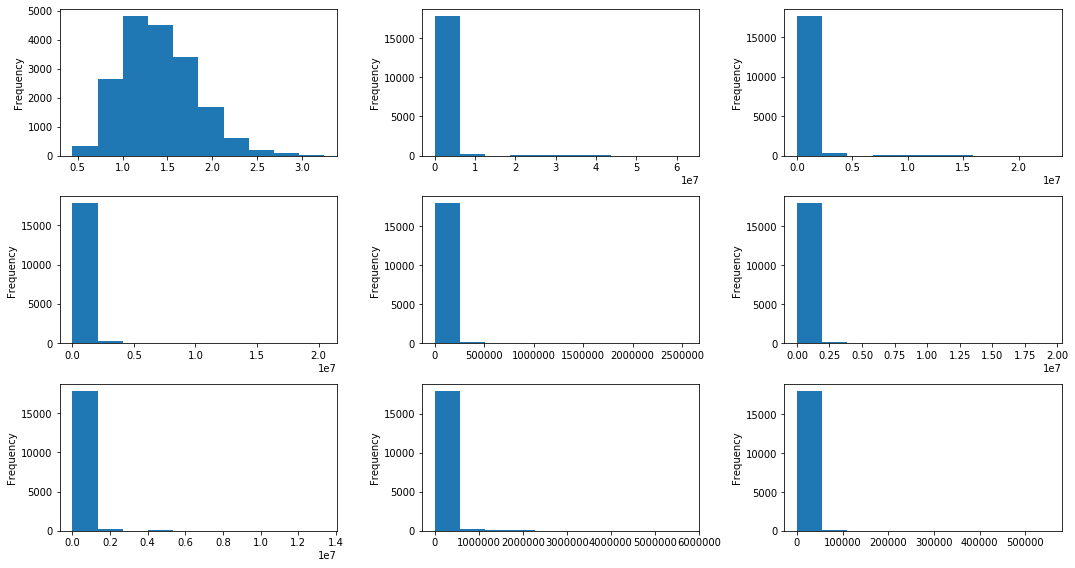

In [320]:
fig,ax=plt.subplots(3,3,figsize=(15,8))
df1["AveragePrice"].plot.hist(ax=ax[0,0])
df1["Total Volume"].plot.hist(ax=ax[0,1])
df1["4046"].plot.hist(ax=ax[0,2])
df1["4225"].plot.hist(ax=ax[1,0])
df1["4770"].plot.hist(ax=ax[1,1])
df1["Total Bags"].plot.hist(ax=ax[1,2])
df1["Small Bags"].plot.hist(ax=ax[2,0])
df1["Large Bags"].plot.hist(ax=ax[2,1])
df1["XLarge Bags"].plot.hist(ax=ax[2,2])
plt.tight_layout()
plt.show()

In [321]:
df1.groupby("year")["type"].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [322]:
Organic=df1[df1["type"]=="organic"]
conventional=df1[df1["type"]=="organic"]

In [323]:
#checking average volume , sales and price every year of organic and conventional type 
print("Average price of organic type avocado every year:",Organic.groupby('year')['AveragePrice'].mean())
print()
print("Average price of conventional type avocado every year:",conventional.groupby('year')['AveragePrice'].mean())
print()
print("Average volume of organic type avocado every year:",Organic.groupby('year')['Total Volume'].mean())
print()
print("Average volume of conventional type avocado every year:",conventional.groupby('year')['Total Volume'].mean())

Average price of organic type avocado every year: year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

Average price of conventional type avocado every year: year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

Average volume of organic type avocado every year: year
2015    31659.931012
2016    46524.244580
2017    58790.176864
2018    74895.480139
Name: Total Volume, dtype: float64

Average volume of conventional type avocado every year: year
2015    31659.931012
2016    46524.244580
2017    58790.176864
2018    74895.480139
Name: Total Volume, dtype: float64


In [324]:
df1.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [325]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Day']=df1['Date'].apply(lambda x:x.day)

In [326]:
df1.drop(columns="Date",inplace=True)

In [327]:
df1.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [328]:
# Replacing 0 with mean 
df1["4046"].replace(0,df1["4046"].mean(),inplace=True)


In [329]:
df1["4225"].replace(0,df1["4225"].mean(),inplace=True)
df1["4770"].replace(0,df1["4770"].mean(),inplace=True)
df1["Total Bags"].replace(0,df1["Total Bags"].mean(),inplace=True)
df1["Small Bags"].replace(0,df1["Small Bags"].mean(),inplace=True)
df1["Large Bags"].replace(0,df1["Large Bags"].mean(),inplace=True)
df1["XLarge Bags"].replace(0,df1["XLarge Bags"].mean(),inplace=True)

In [330]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [331]:
df1.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,conventional,2015,Albany,11,29


In [332]:
from sklearn.preprocessing import LabelEncoder

In [333]:
le=LabelEncoder()
df1["type"]=le.fit_transform(df1["type"].astype(str))
df1["type"]

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [334]:
le=LabelEncoder()
df1["region"]=le.fit_transform(df1["region"].astype(str))
df1["region"]

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [335]:
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.206687,-0.172693,-0.146752,-0.176847,-0.173151,-0.154010,-0.084869,0.615845,0.093197,-0.011716,0.075134,0.061157
Total Volume,-0.192752,1.000000,0.977463,0.974078,0.864455,0.963022,0.966977,0.877119,0.736038,-0.232434,0.017193,0.174176,-0.015344,-0.013212
4046,-0.206687,0.977463,1.000000,0.925593,0.826171,0.919631,0.924627,0.835021,0.688072,-0.222827,0.003574,0.192410,-0.014655,-0.014658
4225,-0.172693,0.974078,0.925593,1.000000,0.880332,0.905656,0.915659,0.806358,0.677366,-0.231493,-0.009718,0.145953,-0.015767,-0.014521
4770,-0.146752,0.864455,0.826171,0.880332,1.000000,0.784314,0.794642,0.689588,0.667364,-0.147329,-0.036746,0.085718,-0.024095,-0.012765
Total Bags,-0.176847,0.963022,0.919631,0.905656,0.784314,1.000000,0.994105,0.939750,0.794760,-0.217594,0.071310,0.175447,-0.013049,-0.008690
Small Bags,-0.173151,0.966977,0.924627,0.915659,0.794642,0.994105,1.000000,0.898993,0.796916,-0.218465,0.061902,0.165930,-0.012474,-0.007877
Large Bags,-0.154010,0.877119,0.835021,0.806358,0.689588,0.939750,0.898993,1.000000,0.702041,-0.173936,0.074300,0.196301,-0.015441,-0.011309
XLarge Bags,-0.084869,0.736038,0.688072,0.677366,0.667364,0.794760,0.796916,0.702041,1.000000,-0.120678,0.069213,0.082393,-0.007228,-0.003209
type,0.615845,-0.232434,-0.222827,-0.231493,-0.147329,-0.217594,-0.218465,-0.173936,-0.120678,1.000000,-0.000032,-0.000280,0.000017,-0.000052


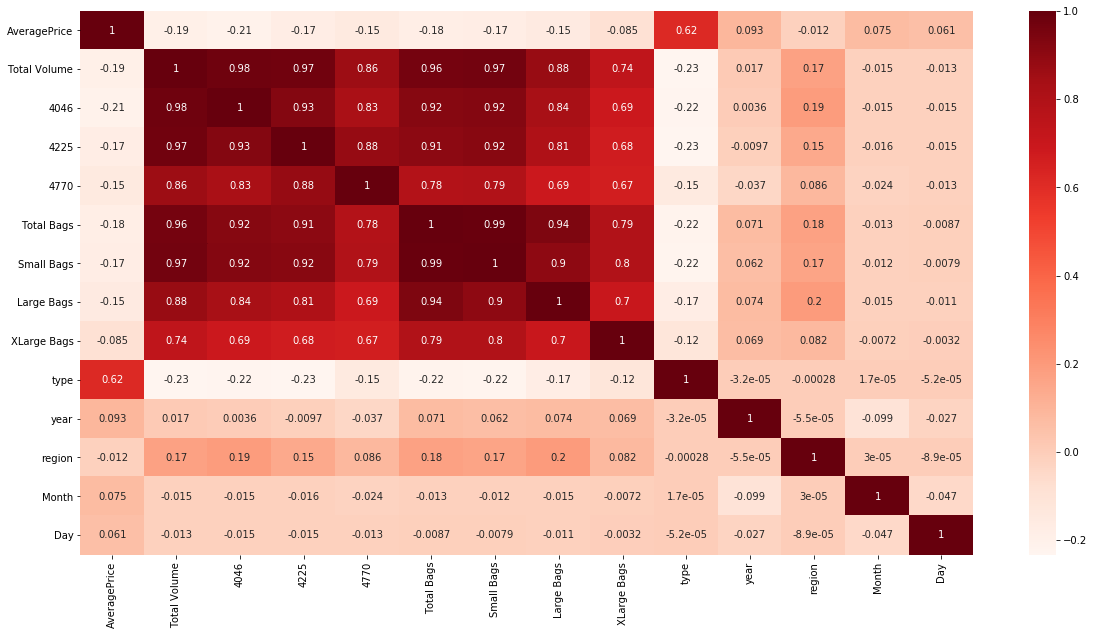

In [336]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),cmap="Reds",annot=True)
plt.show()

In [337]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648526
4225             8.942760
4770            10.244212
Total Bags       9.756195
Small Bags       9.541906
Large Bags       9.818731
XLarge Bags     13.483327
type             0.000329
year             0.215339
region           0.000030
Month            0.047551
Day             -0.001609
dtype: float64

In [338]:
#Removing outliers
from scipy.stats import zscore

z_score=abs(zscore(df1))
threshold = 3
print(np.where(z_score<3))
print(df1.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [339]:
df1_new = df1[(z_score<3).all(axis = 1)]

In [340]:
df1_new.shape

(17665, 14)

In [341]:
df1_new.skew()

AveragePrice    0.378326
Total Volume    3.752409
4046            4.860146
4225            4.428792
4770            4.843557
Total Bags      4.048569
Small Bags      4.198751
Large Bags      4.879193
XLarge Bags     6.279517
type           -0.036126
year            0.229600
region          0.013290
Month           0.046573
Day            -0.005161
dtype: float64

In [342]:
for i in df1_new.columns:
    if df1_new.skew().loc[i]>0.59:
        df1_new[i]=np.log1p(df1_new[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [343]:
df1_new.skew()

AveragePrice    0.378326
Total Volume   -0.048916
4046           -0.306632
4225           -0.525728
4770           -0.791937
Total Bags     -0.324490
Small Bags     -0.456738
Large Bags     -0.719416
XLarge Bags    -2.096522
type           -0.036126
year            0.229600
region          0.013290
Month           0.046573
Day            -0.005161
dtype: float64

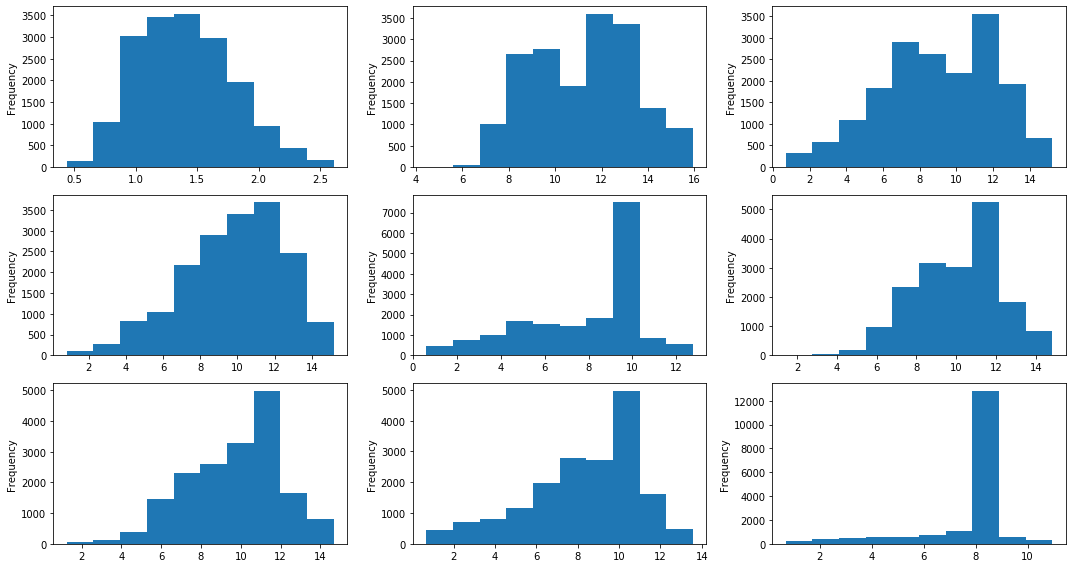

In [344]:
fig,ax=plt.subplots(3,3,figsize=(15,8))
df1_new["AveragePrice"].plot.hist(ax=ax[0,0])
df1_new["Total Volume"].plot.hist(ax=ax[0,1])
df1_new["4046"].plot.hist(ax=ax[0,2])
df1_new["4225"].plot.hist(ax=ax[1,0])
df1_new["4770"].plot.hist(ax=ax[1,1])
df1_new["Total Bags"].plot.hist(ax=ax[1,2])
df1_new["Small Bags"].plot.hist(ax=ax[2,0])
df1_new["Large Bags"].plot.hist(ax=ax[2,1])
df1_new["XLarge Bags"].plot.hist(ax=ax[2,2])
plt.tight_layout()
plt.show()

In [345]:
#Still outliers are remaining lets try IQR Method
Q1 = df1_new.quantile(0.25)
Q3 = df1_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AveragePrice     0.550000
Total Volume     3.613823
4046             4.744896
4225             3.799060
4770             4.173579
Total Bags       3.020614
Small Bags       3.278030
Large Bags       4.117479
XLarge Bags      0.000000
type             1.000000
year             2.000000
region          26.000000
Month            7.000000
Day             16.000000
dtype: float64


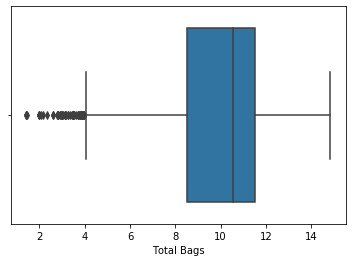

In [346]:
sns.boxplot(x=df1_new["Total Bags"])

In [347]:
low_limit=df1_new["Total Bags"].quantile(0.25)-1.5*(df1_new["Total Bags"].quantile(0.75)-df1_new["Total Bags"].quantile(0.25))
up_limit=df1_new["Total Bags"].quantile(0.75)+1.5*(df1_new["Total Bags"].quantile(0.75)-df1_new["Total Bags"].quantile(0.25))
print(low_limit,up_limit)

3.986642096306044 16.069098167444906


In [349]:
df1_new.loc[df1_new["Total Bags"]<low_limit,"Total Bags"]=np.mean(df1_new['Total Bags'])

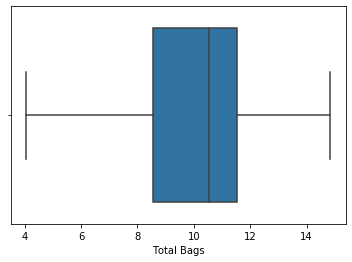

In [350]:
sns.boxplot(x=df1_new["Total Bags"])

In [351]:
low_limit1=df1_new["4225"].quantile(0.25)-1.5*(df1_new["4225"].quantile(0.75)-df1_new["4225"].quantile(0.25))
up_limit1=df1_new["4225"].quantile(0.75)+1.5*(df1_new["4225"].quantile(0.75)-df1_new["4225"].quantile(0.25))
print(low_limit1,up_limit1)

2.295003366687565 17.49124235068112


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


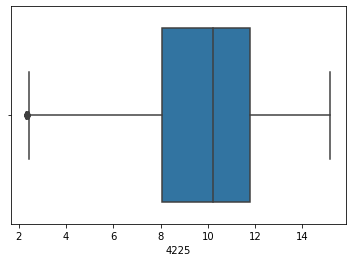

In [353]:
df1_new.loc[df1_new["4225"]<low_limit1,"4225"]=np.mean(df1_new['4225'])
sns.boxplot(x=df1_new["4225"])

3.986642096306044 16.069098167444906


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


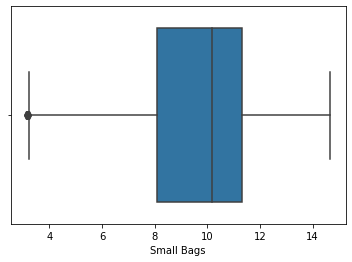

In [354]:
low_limit2=df1_new["Small Bags"].quantile(0.25)-1.5*(df1_new["Small Bags"].quantile(0.75)-df1_new["Small Bags"].quantile(0.25))
up_limit2=df1_new["Small Bags"].quantile(0.75)+1.5*(df1_new["Small Bags"].quantile(0.75)-df1_new["Small Bags"].quantile(0.25))
print(low_limit,up_limit)
df1_new.loc[df1_new["Small Bags"]<low_limit2,"Small Bags"]=np.mean(df1_new['Small Bags'])
sns.boxplot(x=df1_new["Small Bags"])

3.986642096306044 16.069098167444906


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


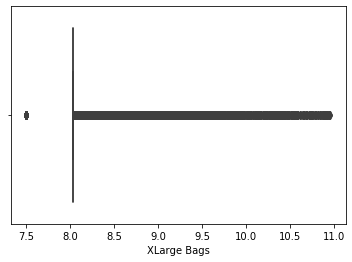

In [355]:
low_limit3=df1_new["XLarge Bags"].quantile(0.25)-1.5*(df1_new["XLarge Bags"].quantile(0.75)-df1_new["XLarge Bags"].quantile(0.25))
up_limit3=df1_new["XLarge Bags"].quantile(0.75)+1.5*(df1_new["XLarge Bags"].quantile(0.75)-df1_new["XLarge Bags"].quantile(0.25))
print(low_limit,up_limit)
df1_new.loc[df1_new["XLarge Bags"]<low_limit3,"XLarge Bags"]=np.mean(df1_new['XLarge Bags'])
sns.boxplot(x=df1_new["XLarge Bags"])

In [356]:

df1_new.skew()

AveragePrice    0.378326
Total Volume   -0.048916
4046           -0.306632
4225           -0.450272
4770           -0.791937
Total Bags     -0.258510
Small Bags     -0.362469
Large Bags     -0.719416
XLarge Bags     2.801460
type           -0.036126
year            0.229600
region          0.013290
Month           0.046573
Day            -0.005161
dtype: float64

#Summary:
1)In begining we checkked the size , top and bottom of datset

2)Then we checked for any null values if present that is blank values or NAN

3)Then we performed descriptive analysis and got to know that data is having no null values, but contains outliers , and some columns are skewwed. Also some columns contain 0 as a value which we treated for better EDA

4) Through univariate analyssis we visualised the outliers and distribution of the data

5) We also saw Avg price, volume of organic and conventional types of avocado in given years


# Model building

In [357]:
df1_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [359]:
x = df1_new.drop(columns=['AveragePrice',"Day"])
y = df1_new[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17665, 12)
(17665, 1)


In [362]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)


array([[-0.06338205, -0.67083943,  0.41594222, ..., -1.21031372,
        -1.69532788,  1.59306193],
       [-0.13564905, -0.8090018 ,  0.34044151, ..., -1.21031372,
        -1.69532788,  1.59306193],
       [ 0.21653592, -0.75623674,  0.68006712, ..., -1.21031372,
        -1.69532788,  1.59306193],
       ...,
       [-0.77021563, -0.62602828, -0.76150211, ...,  1.98028349,
         1.74713142, -1.52447499],
       [-0.69538397, -0.54629366, -0.68744117, ...,  1.98028349,
         1.74713142, -1.52447499],
       [-0.66038447, -0.34086061, -0.77676792, ...,  1.98028349,
         1.74713142,  0.17599969]])

In [368]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print(r2_scr)

0.5214901196976229


In [369]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.20821050318229012
MSE: 0.07072738972006724
RMSE: 0.2659462158408486


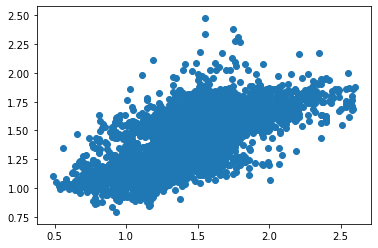

In [370]:
plt.scatter(x=y_test,y=pred)

In [372]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

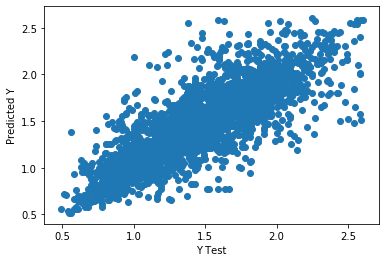

In [373]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [374]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14844324936314746
MSE: 0.04823574865553354
RMSE: 0.21962638424272604


In [407]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [410]:

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)


MAE: 0.09611519954712706
MSE: 0.021499879705632604
RMSE: 0.14662837278518986
R2 Score : 85.45414314712252


Text(0, 0.5, 'pred')

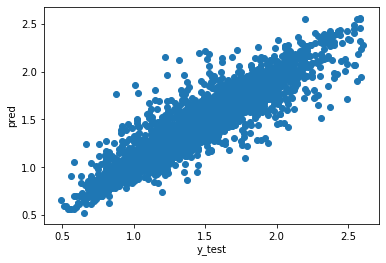

In [411]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('pred')

So Basis above depiction we have got very low RMSE and good R2 score in Random forest model. hence finalising the Random forest model


In [416]:
# Now preditcing region so moving to classification algorithms
x1 = df1_new.drop(columns=['region','Day'])
y1 = df1_new[["region"]]
print(x1.shape)
print(y1.shape)

(17665, 12)
(17665, 1)


In [417]:
sc = StandardScaler()
sc.fit_transform(x1)


array([[-0.19470912, -0.06338205, -0.67083943, ..., -1.01822434,
        -1.21031372,  1.59306193],
       [-0.14286397, -0.13564905, -0.8090018 , ..., -1.01822434,
        -1.21031372,  1.59306193],
       [-1.23161201,  0.21653592, -0.75623674, ..., -1.01822434,
        -1.21031372,  1.59306193],
       ...,
       [ 1.2051098 , -0.77021563, -0.62602828, ...,  0.98210184,
         1.98028349, -1.52447499],
       [ 1.36064523, -0.69538397, -0.54629366, ...,  0.98210184,
         1.98028349, -1.52447499],
       [ 0.55704549, -0.66038447, -0.34086061, ...,  0.98210184,
         1.98028349,  0.17599969]])

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [425]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=57,test_size=0.20)
model=LogisticRegression()
model.fit(x1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [427]:
y1_pred=model.predict(x1_test)
print("Accuracy_score:",accuracy_score(y1_test,y1_pred))

Accuracy_score: 0.14095669402773847


In [430]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
    for i in model:
        i.fit(x1_train,y1_train)
        y1_pred = i.predict(x1_test)
        ac_score = accuracy_score(y1_test,y1_pred)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.7902632323804133
accuracy score correspond to random state  40 is 0.729408434757996
accuracy score correspond to random state  41 is 0.780922728559298
accuracy score correspond to random state  41 is 0.72459666006227
accuracy score correspond to random state  42 is 0.7877158222473818
accuracy score correspond to random state  42 is 0.7322388904613643
accuracy score correspond to random state  43 is 0.7704500424568356
accuracy score correspond to random state  43 is 0.7356354373054061
accuracy score correspond to random state  44 is 0.7820549108406454
accuracy score correspond to random state  44 is 0.7313897537503538
accuracy score correspond to random state  45 is 0.7829040475516558
accuracy score correspond to random state  45 is 0.7192187942258703
accuracy score correspond to random state  46 is 0.79054627795075
accuracy score correspond to random state  46 is 0.731106708180017
accuracy score correspond to random state  47 is 0.7797

In [431]:
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(x1_train,y1_train)
gridsearch.best_params_

{'n_neighbors': 1}

In [433]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(x1_train,y1_train)
predc = KNC.predict(x1_test)
acu_score = accuracy_score(y1_test,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 77.72431361449193


In [434]:
score = cross_val_score(KNC,x1,y1,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  73.7835772984078
Mean Score      :  73.7835772984078
STD score       :  0.0


In [436]:
joblib.dump(model, 'Project_8.obj')

['Project_8.obj']